### sklearn.ensemble.RandomForestClassifier
* class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [9]:
train_df = pd.read_csv('../datasets/HAR_train.csv')
test_df = pd.read_csv('../datasets/HAR_test.csv')



In [10]:
encoder = LabelEncoder()
train_df['Labels']= encoder.fit_transform(train_df['Activity'])

In [11]:
X_train = train_df.drop(['Activity', 'Labels', 'subject'], axis=1)
y_train = train_df['Labels']

X_test = test_df.drop(['Activity', 'subject'], axis=1)
y_test = LabelEncoder().fit_transform(test_df['Activity']) 

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rfc.feature_importances_

In [15]:
ftr_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
ftr_importances

tBodyAcc-mean()-X                       0.000270
tBodyAcc-mean()-Y                       0.000271
tBodyAcc-mean()-Z                       0.000149
tBodyAcc-std()-X                        0.003156
tBodyAcc-std()-Y                        0.000312
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000429
angle(tBodyGyroJerkMean,gravityMean)    0.000250
angle(X,gravityMean)                    0.029676
angle(Y,gravityMean)                    0.024415
angle(Z,gravityMean)                    0.012436
Length: 561, dtype: float64

In [22]:
sorted_ft_im = ftr_importances.sort_values(ascending=False)
data = sorted_ft_im[:20]
df = pd.DataFrame(data, columns=['feature_importances'])

<Axes: xlabel='feature_importances'>

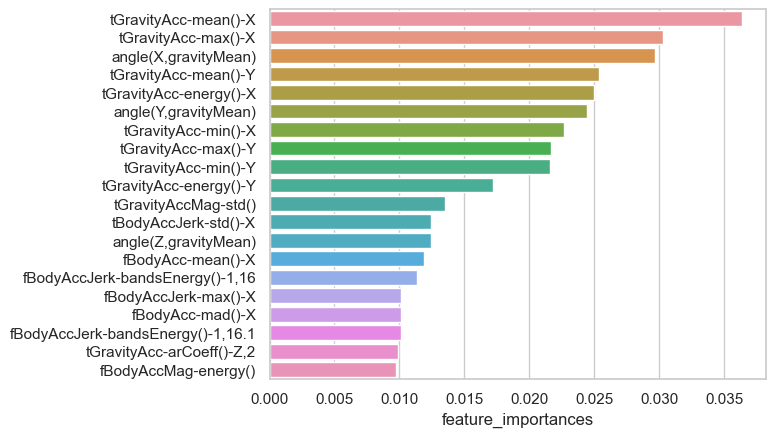

In [24]:
import seaborn as sns

sns.set_theme(style="whitegrid") ## figure, axes 스타일
sns.barplot(x='feature_importances', y=df.index, data=df, orient='h')

# seaborn은 dataframe만 지원하나 ?

In [26]:
X_train_ft_im = X_train[df.index]

In [27]:
from sklearn.model_selection import GridSearchCV

params={
    "max_depth":[8,12,16,20],
    "min_samples_split" : [16,24]
}

X_train_ft_im = X_train[df.index]

grid_cv = GridSearchCV(rfc , param_grid=params , cv=5 , verbose=1)
grid_cv.fit(X_train_ft_im , y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             verbose=1)

In [28]:
best_rfc = grid_cv.best_estimator_

In [29]:
pred = best_rfc.predict(X_test[df.index])

In [30]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

accuracy_score(y_test, pred)

0.8018323719036308